# **Publicaciones PubMed**

In [47]:
"""1º Importo las librerías que creo que puedo necesitar en esta tarea."""

# Manejo de datos
import pandas as pd  # Análisis y manipulación de datos en tablas

# Visualización de datos
import matplotlib.pyplot as plt  # Gráficos básicos en 2D

In [48]:
publicaciones = pd.read_csv(r"C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_PubMed\rare_disease_papers_detailed.csv")
publicaciones

,pmid,title,pub_year,pubtype,journal
0,19973918,A Case of a Rare Disease of the Long Bones ter...,1909,Journal Article,Proceedings of the Royal Society of Medicine
1,19979883,A Rare Disease in Two Brothers.,1917,Journal Article,Proceedings of the Royal Society of Medicine
2,30438855,"A Rare Disease of the Conjunctiva, with Sponta...",1933,Journal Article,Glasgow medical journal
3,20282579,"Sandifort's Observationes, chapter I, concerni...",1946,Biography; Journal Article,Bulletin of the history of medicine
4,20985704,"Chronic erosive, granulomatous, atrophic gastr...",1946,Journal Article,Gastroenterology
...,...,...,...,...,...
2612,37157123,Hereditary angioedema in cardiac surgery: Peri...,2024,Case Reports; Journal Article,Perfusion
2613,37022085,DFML: Dynamic Federated Meta-Learning for Rare...,2024,"Journal Article; Research Support, Non-U.S. Gov't",IEEE/ACM transactions on computational biology...
2614,36454089,Whipple's disease - A typical endoscopic findi...,2024,Case Reports; Journal Article,Revista espanola de enfermedades digestivas
2615,35624016,Intravascular large B-cell lymphoma with prima...,2024,Case Reports; Journal Article,"Hematology, transfusion and cell therapy"


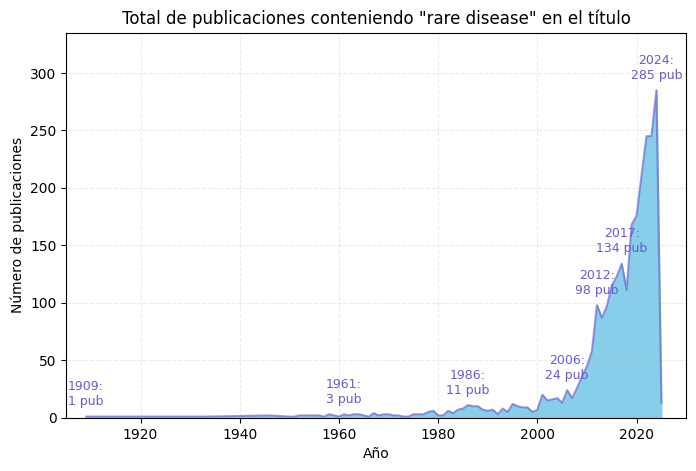

In [58]:
publicaciones_año = publicaciones.groupby(['pub_year']).size().reset_index(name='count')

x = publicaciones_año['pub_year']
y = publicaciones_año['count']

# Gráfico
plt.figure(figsize=(8, 5))
plt.fill_between(x, y, color="skyblue")
plt.plot(x, y, color="Slateblue", alpha=0.6)
plt.title('Total de publicaciones conteniendo "rare disease" en el título')
plt.xlabel("Año")
plt.ylabel("Número de publicaciones")
plt.xticks(rotation=0)
plt.ylim(0, y.max() + 50)
plt.xlim(1905, 2030)
plt.grid(True, linestyle='--', alpha=0.25)

# Etiquetar picos locales con año y valor
for i in range(len(y)):
    año = x.iloc[i]
    valor = y[i]
    
    if año in [1909, 1961, 1986]:
        plt.text(año, valor + 10, f"{año}:\n{valor} pub", ha='center', fontsize=9, color='Slateblue')
    elif año >= 1960 and valor > y[i - 1] and valor > y[i + 1] and valor > 20:
        plt.text(año, valor + 10, f"{año}:\n{valor} pub", ha='center', fontsize=9, color='Slateblue')

# Mostrar
plt.show()

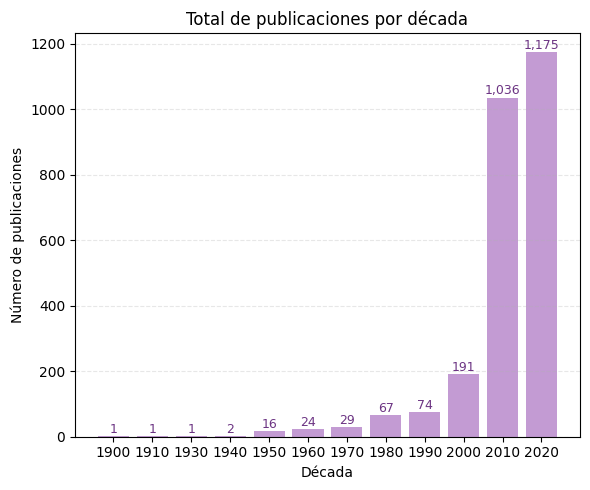

In [68]:
publicaciones_año['decada'] = (publicaciones_año['pub_year'] // 10) * 10
publicaciones_decada = publicaciones_año.groupby('decada')['count'].sum().reset_index()

plt.figure(figsize=(6, 5))
plt.bar(publicaciones_decada['decada'].astype(str), publicaciones_decada['count'], color='#c39bd3')
plt.title("Total de publicaciones por década")
plt.xlabel("Década")
plt.ylabel("Número de publicaciones")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
# Etiquetas de valores
for i, v in enumerate(publicaciones_decada['count']):
    plt.text(i, v + 10, f"{v:,}", ha='center', fontsize=9, color='#6c3483')

plt.show()

In [51]:
antes_2010 = publicaciones_año[publicaciones_año['pub_year'] < 2010]['count'].mean()
despues_2010 = publicaciones_año[publicaciones_año['pub_year'] >= 2010]['count'].mean()

print(f"Promedio anual antes de 2010: {antes_2010:.2f}")
print(f"Promedio anual desde 2010: {despues_2010:.2f}")


Promedio anual antes de 2010: 6.44
Promedio anual desde 2010: 138.19
